In [2]:
#import libraries
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [3]:
#Training, Performace evaluation and Ploting
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    trainedforest = RandomForestClassifier(class_weight='balanced').fit(X_Train,Y_Train)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))
    fpr_rf, tpr_rf, _ = roc_curve(Y_Test, predictionforest)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(8,8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [4]:
#reading data file
df = pd.read_excel('Mini_protein_data_HA_BOT_combined_for_ml.xlsx')

In [5]:
#Defining Lables and Features
#Feature Transformations:- Label encoder and Robust Scaler; Feature Extraction; PCA dimention reduction
X = df.drop(['Category','Category_0_1','Category_0-1_2_3_4','Category_0_1-2_3_4'], axis = 1)
Y = df['Category_0-1_2_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y) 
sfm = SelectFromModel(randomforest, prefit=True)
X = sfm.transform(X)

Base Non-Tranformed data
[[7527  385]
 [ 413 1923]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7912
           1       0.83      0.82      0.83      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.89      0.89     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


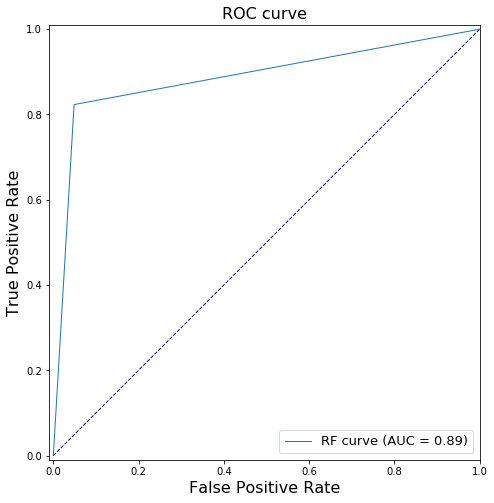

PCA Transformed - 2 dimensions is :-
[40.54910506  3.5599304 ]
[[7175  737]
 [ 946 1390]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7912
           1       0.65      0.60      0.62      2336

    accuracy                           0.84     10248
   macro avg       0.77      0.75      0.76     10248
weighted avg       0.83      0.84      0.83     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


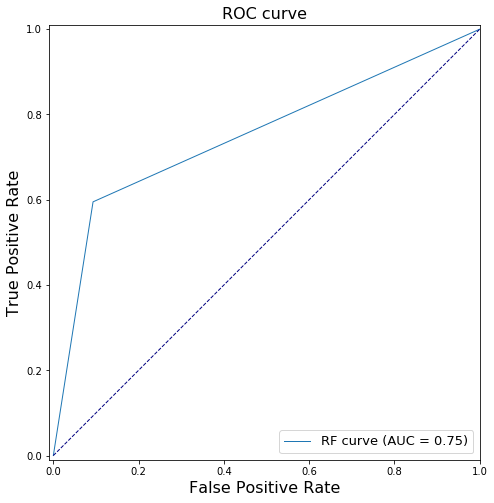

PCA Transformed - 3 dimensions is :-
[40.54910506  3.5599304   1.46203617]
[[7255  657]
 [ 593 1743]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7912
           1       0.73      0.75      0.74      2336

    accuracy                           0.88     10248
   macro avg       0.83      0.83      0.83     10248
weighted avg       0.88      0.88      0.88     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


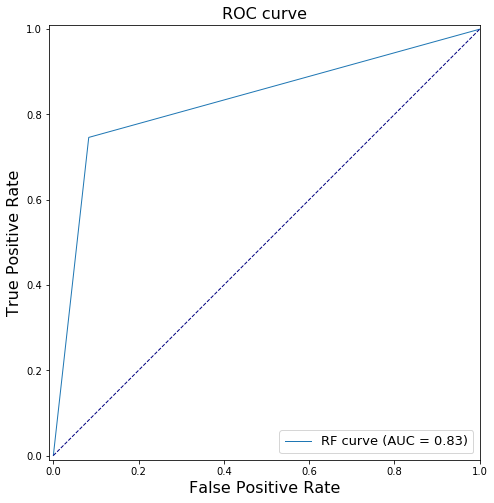

PCA Transformed - 4 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923]
[[7365  547]
 [ 517 1819]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7912
           1       0.77      0.78      0.77      2336

    accuracy                           0.90     10248
   macro avg       0.85      0.85      0.85     10248
weighted avg       0.90      0.90      0.90     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


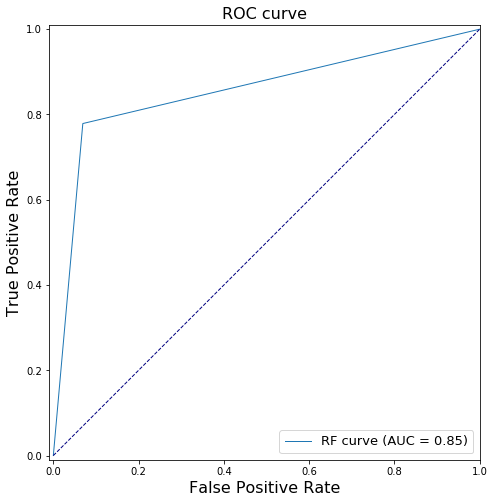

PCA Transformed - 5 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713]
[[7405  507]
 [ 470 1866]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.79      0.80      0.79      2336

    accuracy                           0.90     10248
   macro avg       0.86      0.87      0.87     10248
weighted avg       0.91      0.90      0.90     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


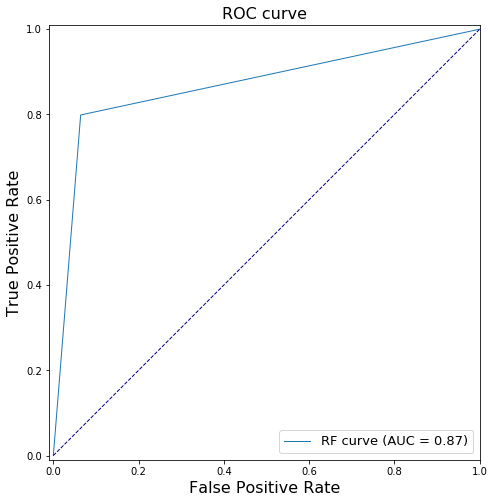

PCA Transformed - 6 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345]
[[7434  478]
 [ 472 1864]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.80      0.80      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


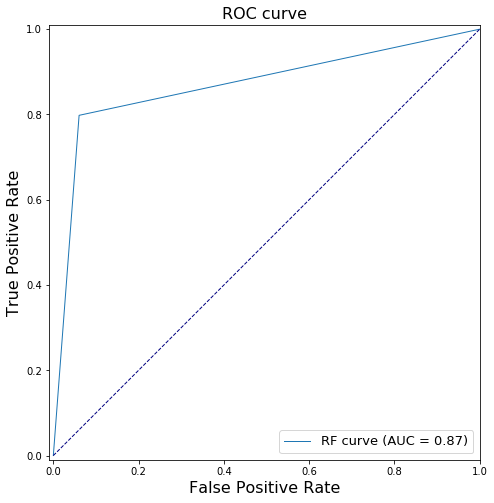

PCA Transformed - 7 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194]
[[7461  451]
 [ 459 1877]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.81      0.80      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


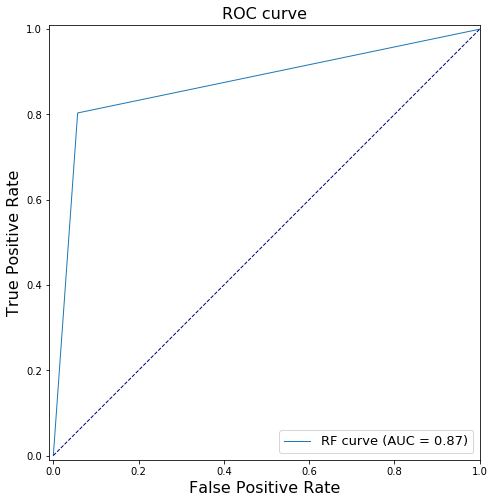

PCA Transformed - 8 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012]
[[7464  448]
 [ 467 1869]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.81      0.80      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


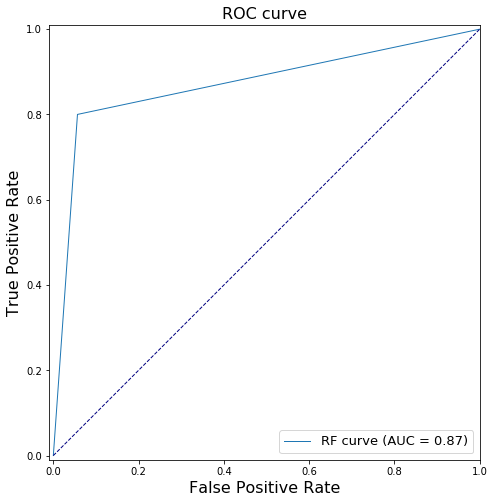

PCA Transformed - 9 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416]
[[7460  452]
 [ 456 1880]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.81      0.80      0.81      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


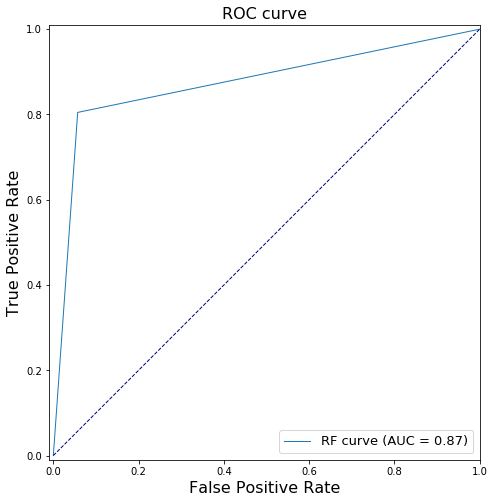

PCA Transformed - 10 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932]
[[7471  441]
 [ 444 1892]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.81      0.81      0.81      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.88      0.88     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


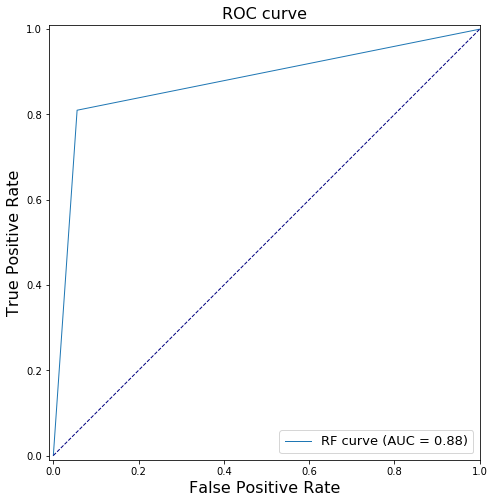

PCA Transformed - 11 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098]
[[7477  435]
 [ 437 1899]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7912
           1       0.81      0.81      0.81      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.88      0.88     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


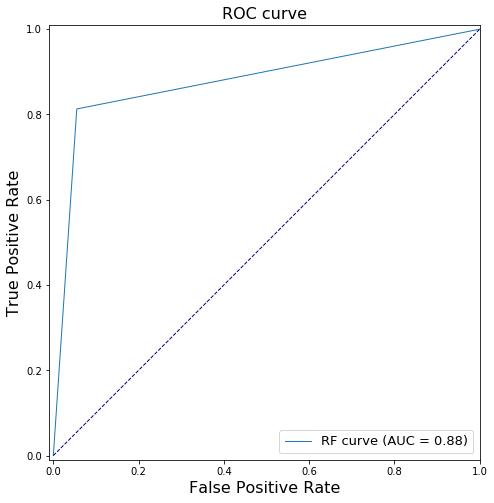

PCA Transformed - 12 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098  0.21728008]
[[7514  398]
 [ 466 1870]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.82      0.80      0.81      2336

    accuracy                           0.92     10248
   macro avg       0.88      0.88      0.88     10248
weighted avg       0.91      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


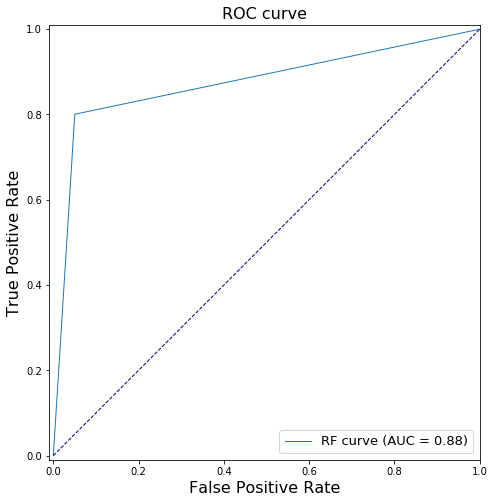

PCA Transformed - 13 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098  0.21728008
  0.20234565]
[[7490  422]
 [ 440 1896]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.82      0.81      0.81      2336

    accuracy                           0.92     10248
   macro avg       0.88      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


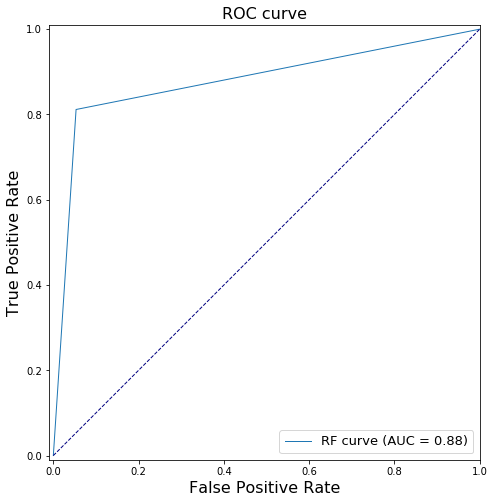

PCA Transformed - 14 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098  0.21728008
  0.20234565  0.16827736]
[[7521  391]
 [ 464 1872]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.83      0.80      0.81      2336

    accuracy                           0.92     10248
   macro avg       0.88      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


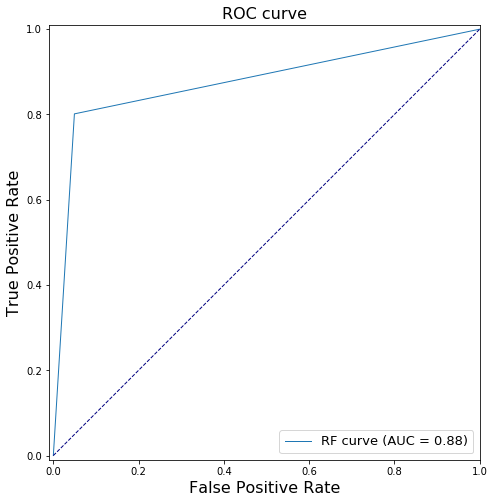

PCA Transformed - 15 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098  0.21728008
  0.20234565  0.16827736  0.14822945]
[[7503  409]
 [ 466 1870]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7912
           1       0.82      0.80      0.81      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.87      0.88     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


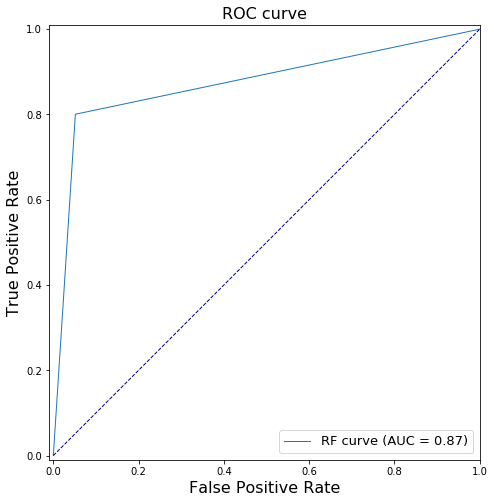

PCA Transformed - 16 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098  0.21728008
  0.20234565  0.16827736  0.14822945  0.13286936]
[[7508  404]
 [ 464 1872]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.82      0.80      0.81      2336

    accuracy                           0.92     10248
   macro avg       0.88      0.88      0.88     10248
weighted avg       0.91      0.92      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


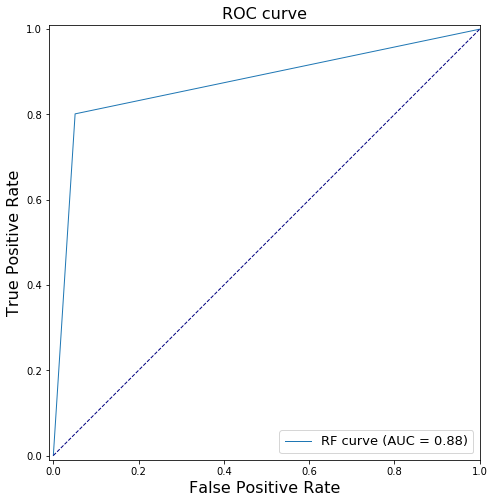

PCA Transformed - 17 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098  0.21728008
  0.20234565  0.16827736  0.14822945  0.13286936  0.1264341 ]
[[7514  398]
 [ 448 1888]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.83      0.81      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.88      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


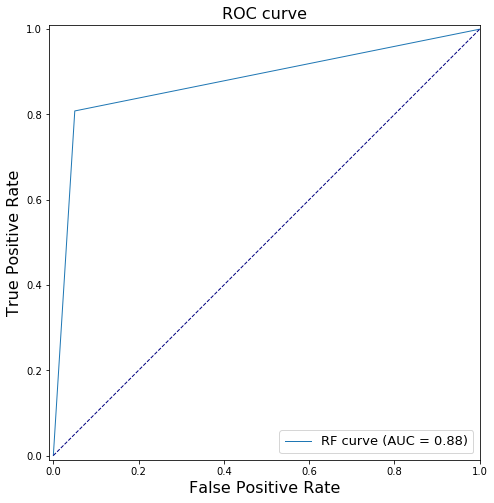

PCA Transformed - 18 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098  0.21728008
  0.20234565  0.16827736  0.14822945  0.13286936  0.1264341   0.09924176]
[[7527  385]
 [ 455 1881]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.83      0.81      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


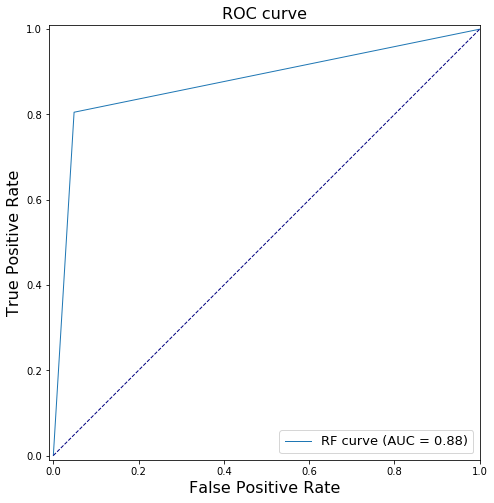

PCA Transformed - 19 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098  0.21728008
  0.20234565  0.16827736  0.14822945  0.13286936  0.1264341   0.09924176
  0.09500347]
[[7523  389]
 [ 460 1876]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.83      0.80      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


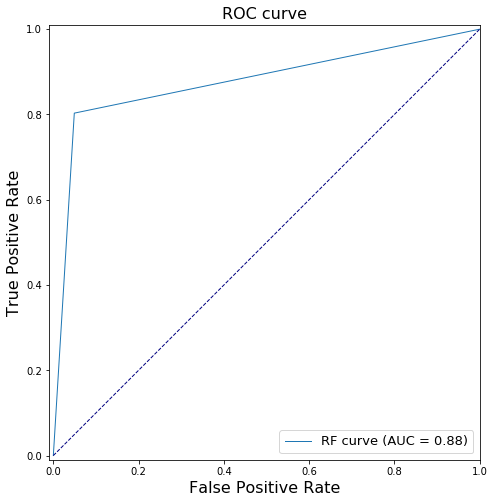

PCA Transformed - 20 dimensions is :-
[40.54910506  3.5599304   1.46203617  1.42047923  1.09978713  1.09459345
  0.58258194  0.40776012  0.34992416  0.31100932  0.26372098  0.21728008
  0.20234565  0.16827736  0.14822945  0.13286936  0.1264341   0.09924176
  0.09500347  0.07554369]
[[7538  374]
 [ 451 1885]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.83      0.81      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


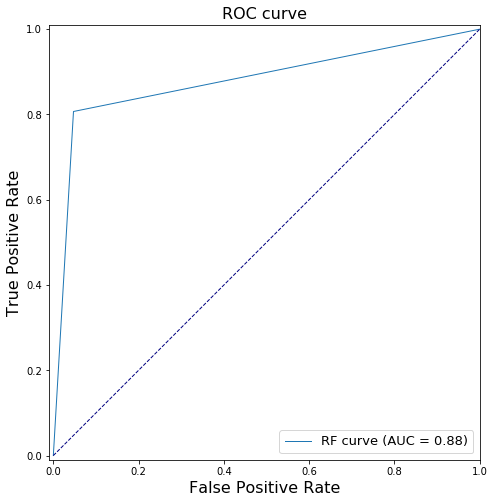

PCA Transformed - 21 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02]
[[7535  377]
 [ 454 1882]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.83      0.81      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


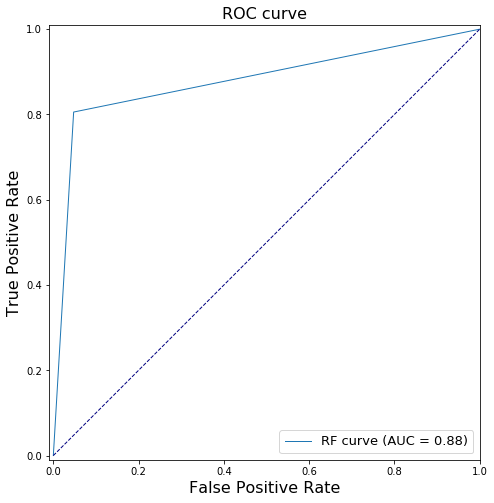

PCA Transformed - 22 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02 2.51121916e-02]
[[7542  370]
 [ 458 1878]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.84      0.80      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


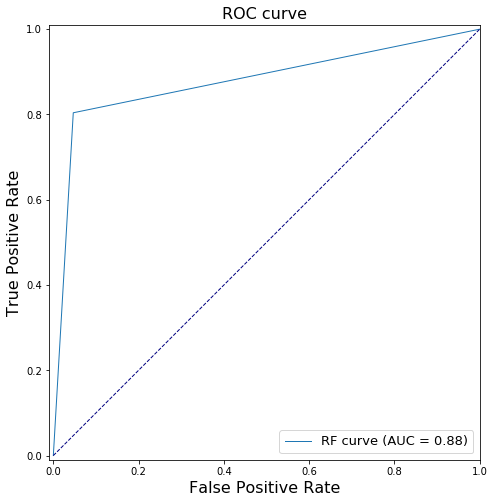

PCA Transformed - 23 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02 2.51121916e-02 2.15773331e-02]
[[7527  385]
 [ 480 1856]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.83      0.79      0.81      2336

    accuracy                           0.92     10248
   macro avg       0.88      0.87      0.88     10248
weighted avg       0.91      0.92      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


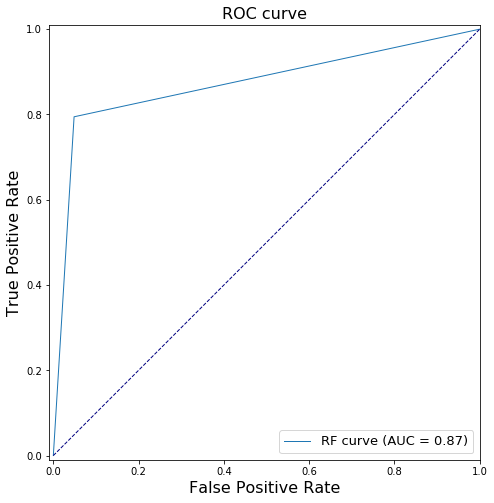

PCA Transformed - 24 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02 2.51121916e-02 2.15773331e-02 1.98225692e-02]
[[7539  373]
 [ 485 1851]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.83      0.79      0.81      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.87      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


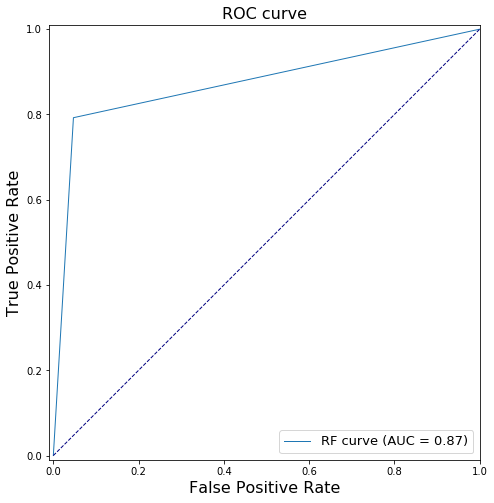

PCA Transformed - 25 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02 2.51121916e-02 2.15773331e-02 1.98225692e-02
 1.70427939e-02]
[[7538  374]
 [ 462 1874]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.83      0.80      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


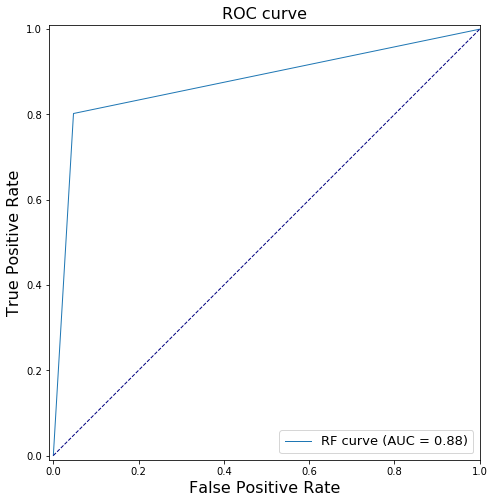

PCA Transformed - 26 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02 2.51121916e-02 2.15773331e-02 1.98225692e-02
 1.70427939e-02 1.55360681e-02]
[[7545  367]
 [ 475 1861]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.84      0.80      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


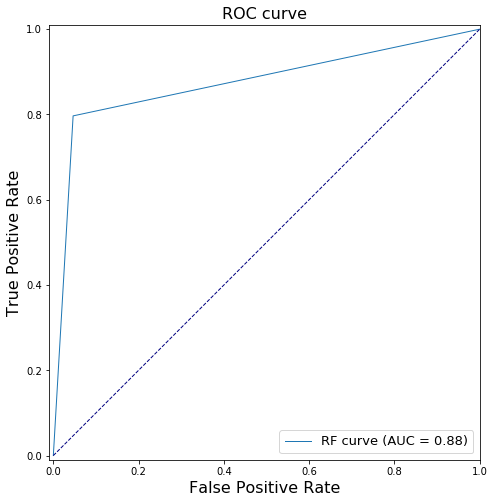

PCA Transformed - 27 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02 2.51121916e-02 2.15773331e-02 1.98225692e-02
 1.70427939e-02 1.55360681e-02 1.21798194e-02]
[[7550  362]
 [ 472 1864]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.84      0.80      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


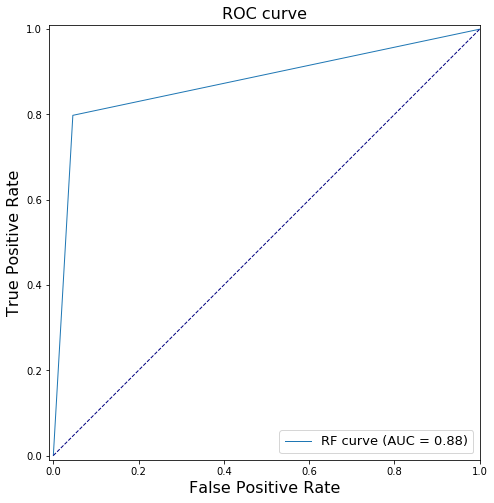

PCA Transformed - 28 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02 2.51121916e-02 2.15773331e-02 1.98225692e-02
 1.70427939e-02 1.55360681e-02 1.21798194e-02 8.96423338e-03]
[[7558  354]
 [ 465 1871]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7912
           1       0.84      0.80      0.82      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.88      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


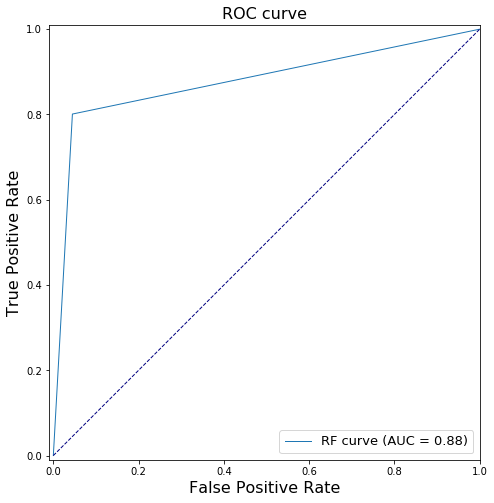

PCA Transformed - 29 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02 2.51121916e-02 2.15773331e-02 1.98225692e-02
 1.70427939e-02 1.55360681e-02 1.21798194e-02 8.96423338e-03
 3.16513189e-03]
[[7561  351]
 [ 490 1846]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7912
           1       0.84      0.79      0.81      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.87      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


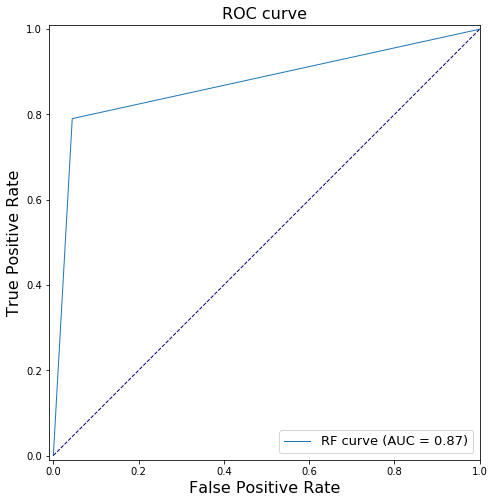

PCA Transformed - 30 dimensions is :-
[4.05491051e+01 3.55993040e+00 1.46203617e+00 1.42047923e+00
 1.09978713e+00 1.09459345e+00 5.82581937e-01 4.07760119e-01
 3.49924162e-01 3.11009317e-01 2.63720984e-01 2.17280076e-01
 2.02345650e-01 1.68277359e-01 1.48229454e-01 1.32869363e-01
 1.26434096e-01 9.92417590e-02 9.50034741e-02 7.55436870e-02
 3.78194672e-02 2.51121916e-02 2.15773331e-02 1.98225692e-02
 1.70427939e-02 1.55360681e-02 1.21798194e-02 8.96423338e-03
 3.16513189e-03 1.95156044e-03]
[[7563  349]
 [ 493 1843]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7912
           1       0.84      0.79      0.81      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.87      0.88     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


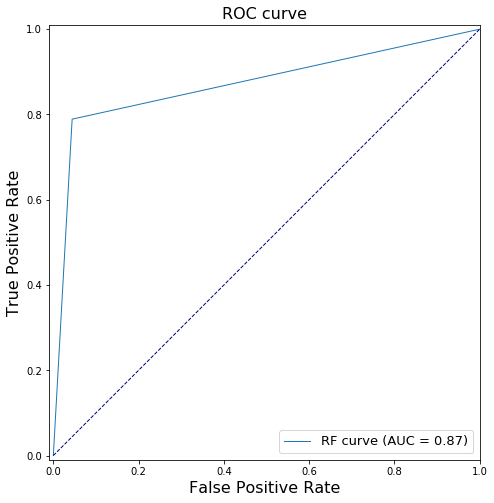

ValueError: n_components=31 must be between 0 and min(n_samples, n_features)=30 with svd_solver='full'

In [5]:
#Checking for best PCA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (2,35):
    pca = PCA(n_components=i,svd_solver='full')
    X_pca = pca.fit_transform(X)
    print("PCA Transformed - "+str(i)+ " dimensions is :-" )
    print(pca.explained_variance_)
    forest_test(X_pca, Y)

In [ ]:
#Plotting Best PCA
pca = PCA(n_components=10,svd_solver='full')
X_pca = pca.fit_transform(X)
print("PCA Transformed Best is in 10 dimensions Resulting in :-" )
print(pca.explained_variance_)
forest_test(X_pca, Y)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 34157 samples in 0.273s...
[t-SNE] Computed neighbors for 34157 samples in 59.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 34157
[t-SNE] Computed conditional probabilities for sample 2000 / 34157
[t-SNE] Computed conditional probabilities for sample 3000 / 34157
[t-SNE] Computed conditional probabilities for sample 4000 / 34157
[t-SNE] Computed conditional probabilities for sample 5000 / 34157
[t-SNE] Computed conditional probabilities for sample 6000 / 34157
[t-SNE] Computed conditional probabilities for sample 7000 / 34157
[t-SNE] Computed conditional probabilities for sample 8000 / 34157
[t-SNE] Computed conditional probabilities for sample 9000 / 34157
[t-SNE] Computed conditional probabilities for sample 10000 / 34157
[t-SNE] Computed conditional probabilities for sample 11000 / 34157
[t-SNE] Computed conditional probabilities for sample 12000 / 34157
[t-SNE] Computed conditional probabilities for s

/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


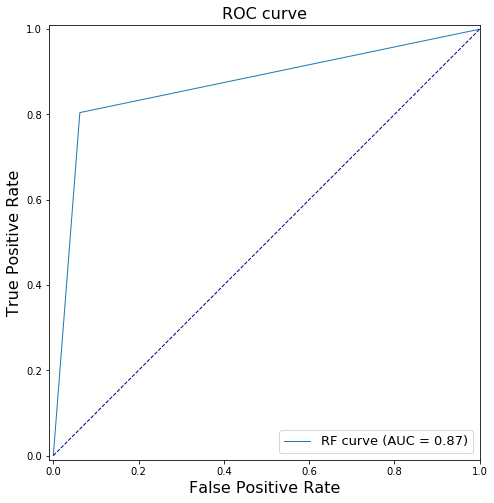

In [7]:
#tSNE dimension reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
X_tsne = tsne.fit_transform(X)
forest_test(X_tsne, Y)

Base Non-Tranformed data
[[7519  393]
 [ 401 1935]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7912
           1       0.83      0.83      0.83      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.89      0.89     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


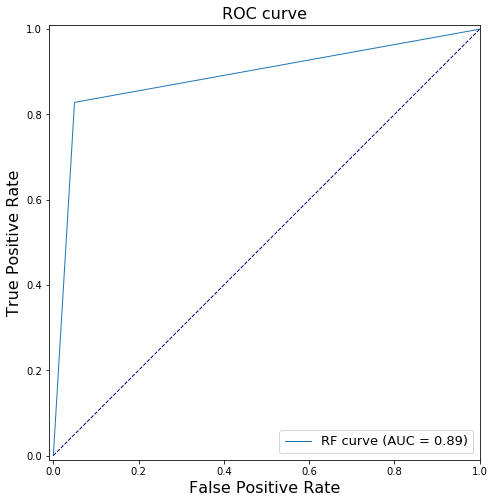

LLE Transformed - 1 dimensions is :-
[[6829 1083]
 [ 778 1558]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7912
           1       0.59      0.67      0.63      2336

    accuracy                           0.82     10248
   macro avg       0.74      0.77      0.75     10248
weighted avg       0.83      0.82      0.82     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


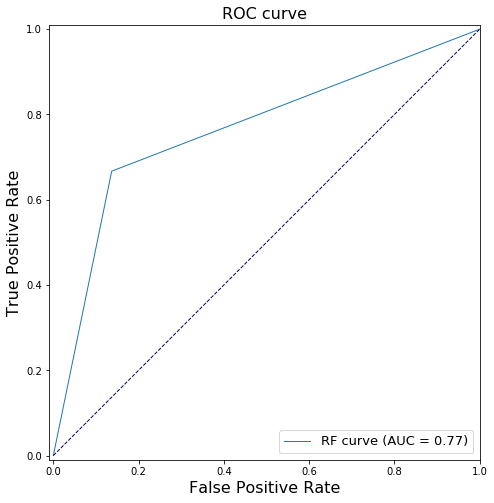

LLE Transformed - 2 dimensions is :-
[[7129  783]
 [ 582 1754]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7912
           1       0.69      0.75      0.72      2336

    accuracy                           0.87     10248
   macro avg       0.81      0.83      0.82     10248
weighted avg       0.87      0.87      0.87     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


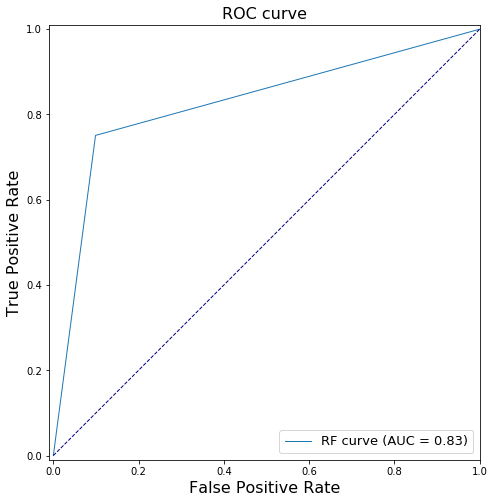

LLE Transformed - 3 dimensions is :-
[[7196  716]
 [ 558 1778]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7912
           1       0.71      0.76      0.74      2336

    accuracy                           0.88     10248
   macro avg       0.82      0.84      0.83     10248
weighted avg       0.88      0.88      0.88     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


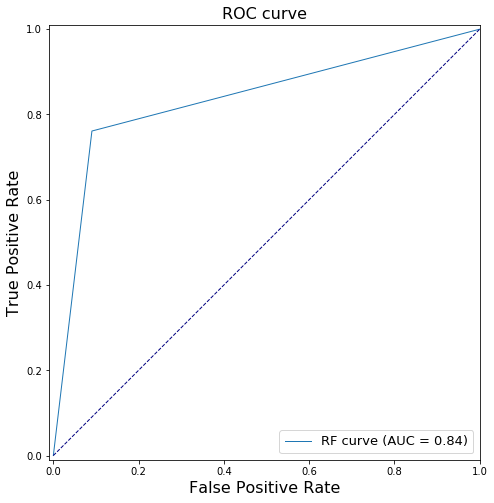

LLE Transformed - 4 dimensions is :-
[[7192  720]
 [ 557 1779]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7912
           1       0.71      0.76      0.74      2336

    accuracy                           0.88     10248
   macro avg       0.82      0.84      0.83     10248
weighted avg       0.88      0.88      0.88     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


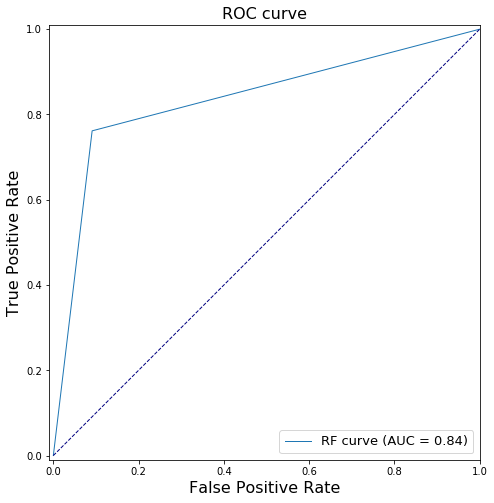

LLE Transformed - 5 dimensions is :-
[[7177  735]
 [ 548 1788]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7912
           1       0.71      0.77      0.74      2336

    accuracy                           0.87     10248
   macro avg       0.82      0.84      0.83     10248
weighted avg       0.88      0.87      0.88     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


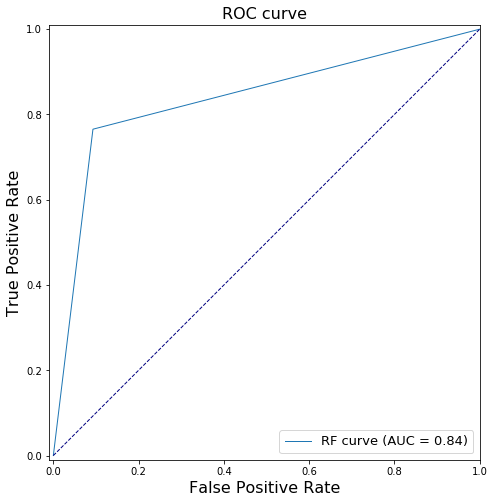

LLE Transformed - 6 dimensions is :-
[[7207  705]
 [ 592 1744]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7912
           1       0.71      0.75      0.73      2336

    accuracy                           0.87     10248
   macro avg       0.82      0.83      0.82     10248
weighted avg       0.88      0.87      0.87     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


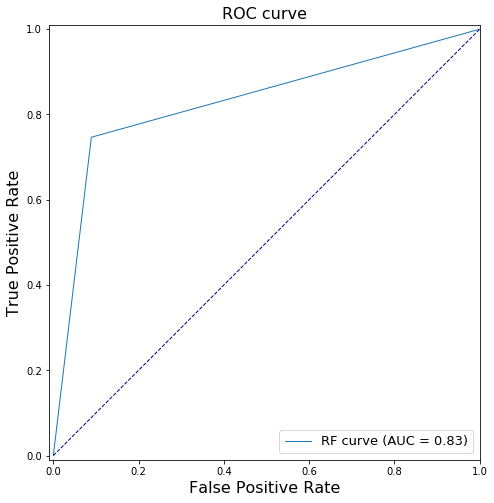

LLE Transformed - 7 dimensions is :-
[[7091  821]
 [ 236 2100]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7912
           1       0.72      0.90      0.80      2336

    accuracy                           0.90     10248
   macro avg       0.84      0.90      0.86     10248
weighted avg       0.91      0.90      0.90     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


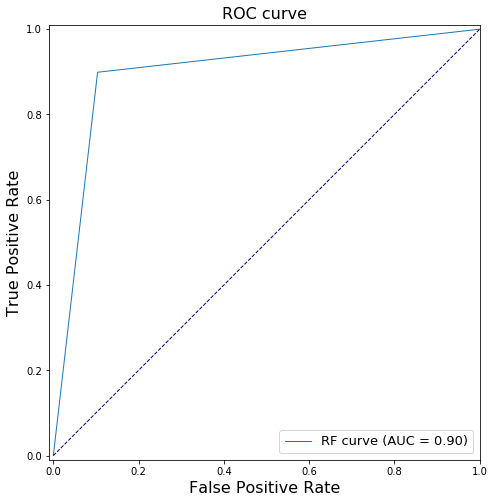

LLE Transformed - 8 dimensions is :-
[[7114  798]
 [ 369 1967]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7912
           1       0.71      0.84      0.77      2336

    accuracy                           0.89     10248
   macro avg       0.83      0.87      0.85     10248
weighted avg       0.90      0.89      0.89     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


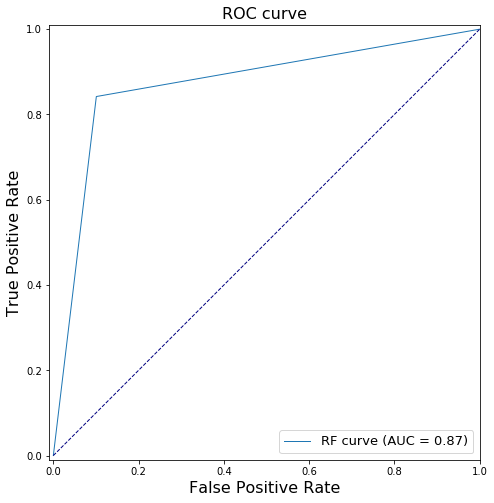

In [ ]:
#Checking for best LLE dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (1,30):
    embedding = LocallyLinearEmbedding(n_components=i)

# run an LLE and use it to transform the features
    X_lle = embedding.fit_transform(X)
    print("LLE Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_lle, Y)

LDA Transformed Best is in 1 dimensions is :-
[[7106  806]
 [ 854 1482]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7912
           1       0.65      0.63      0.64      2336

    accuracy                           0.84     10248
   macro avg       0.77      0.77      0.77     10248
weighted avg       0.84      0.84      0.84     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


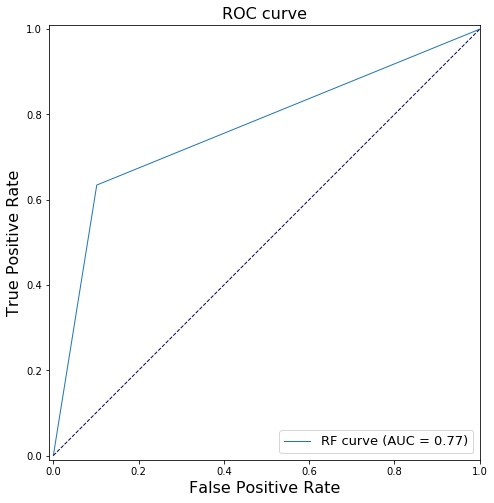

In [5]:
#Plotting Best LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, Y).transform(X)
print("LDA Transformed Best is in 1 dimensions is :-" )
forest_test(X_lda, Y)

Base Non-Tranformed data
[[7533  379]
 [ 400 1936]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7912
           1       0.84      0.83      0.83      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.89      0.89     10248
weighted avg       0.92      0.92      0.92     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


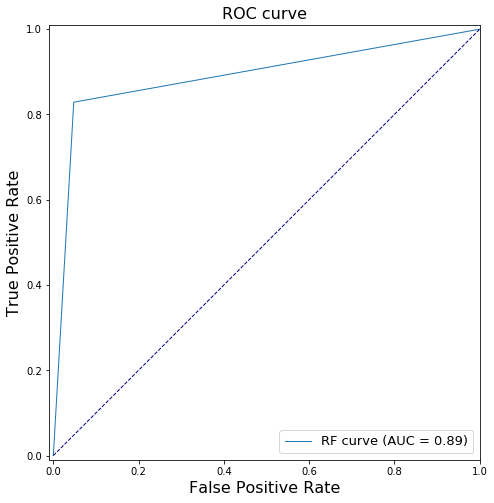

ICA Transformed - 3 dimensions is :-
[[7309  603]
 [ 637 1699]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7912
           1       0.74      0.73      0.73      2336

    accuracy                           0.88     10248
   macro avg       0.83      0.83      0.83     10248
weighted avg       0.88      0.88      0.88     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


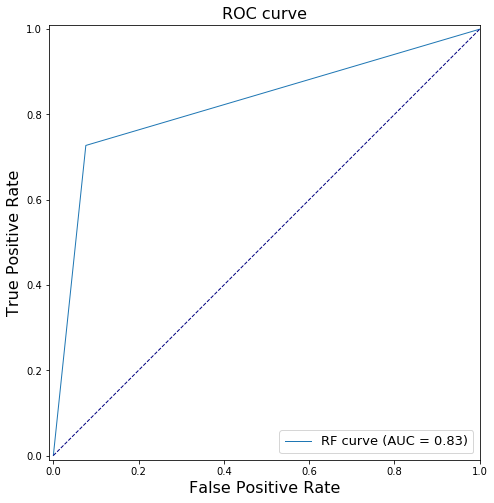

ICA Transformed - 4 dimensions is :-
[[7357  555]
 [ 526 1810]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7912
           1       0.77      0.77      0.77      2336

    accuracy                           0.89     10248
   macro avg       0.85      0.85      0.85     10248
weighted avg       0.89      0.89      0.89     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


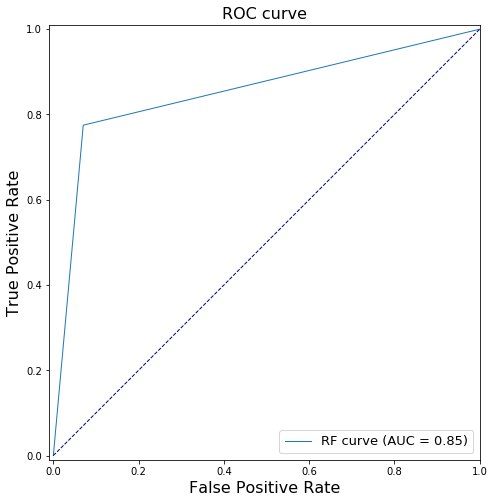

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 5 dimensions is :-
[[7377  535]
 [ 490 1846]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7912
           1       0.78      0.79      0.78      2336

    accuracy                           0.90     10248
   macro avg       0.86      0.86      0.86     10248
weighted avg       0.90      0.90      0.90     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


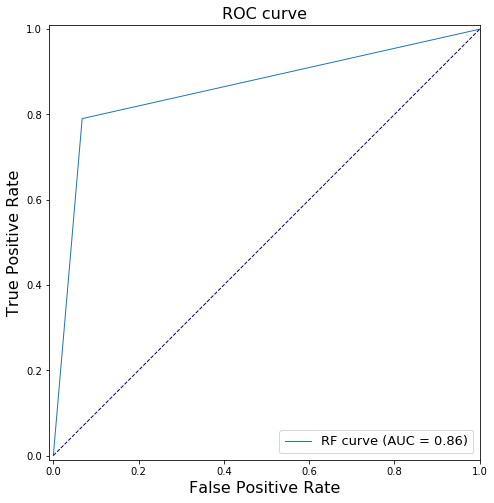

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 6 dimensions is :-
[[7420  492]
 [ 472 1864]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.79      0.80      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


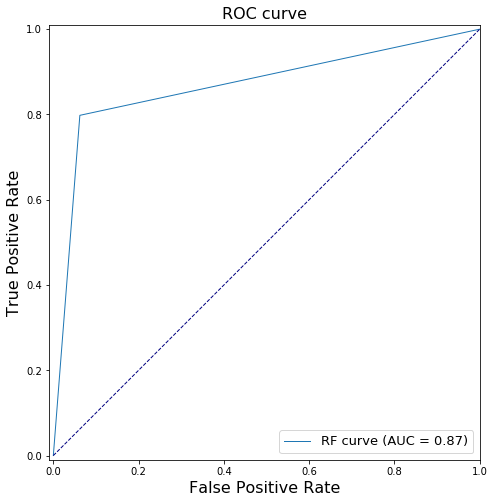

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 7 dimensions is :-
[[7445  467]
 [ 480 1856]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.80      0.79      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


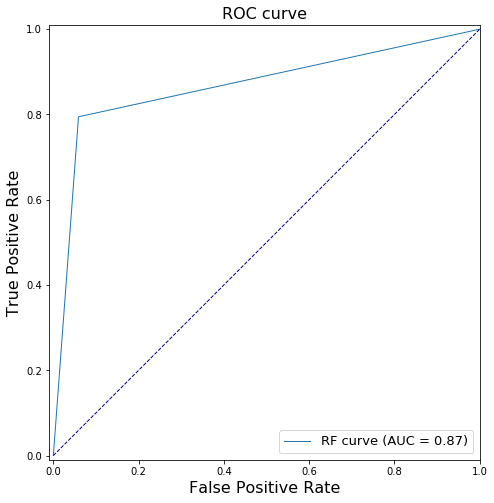

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 8 dimensions is :-
[[7445  467]
 [ 450 1886]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.80      0.81      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


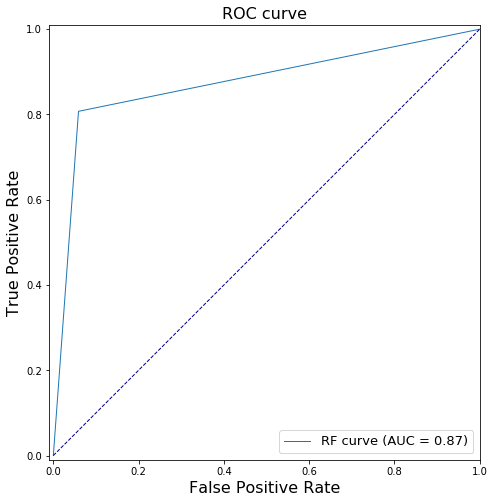

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 9 dimensions is :-
[[7446  466]
 [ 479 1857]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.80      0.79      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


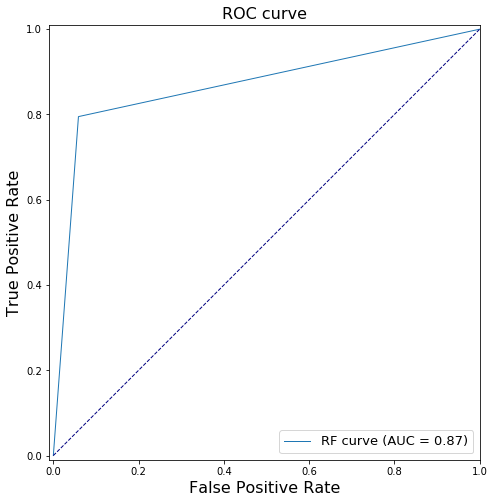

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 10 dimensions is :-
[[7452  460]
 [ 506 1830]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.80      0.78      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


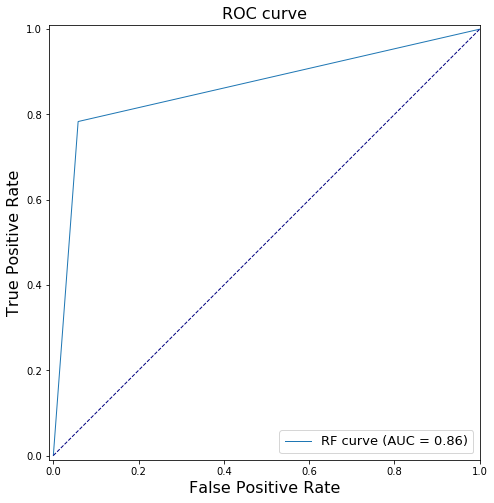

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 11 dimensions is :-
[[7478  434]
 [ 480 1856]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7912
           1       0.81      0.79      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


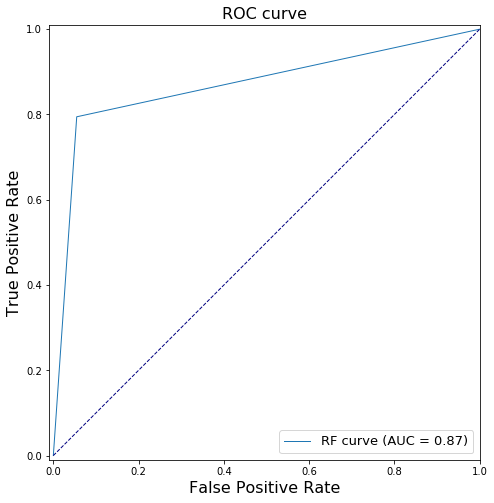

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 12 dimensions is :-
[[7487  425]
 [ 496 1840]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7912
           1       0.81      0.79      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


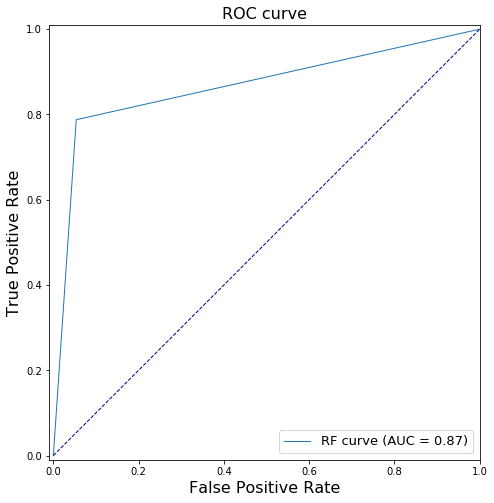

ICA Transformed - 13 dimensions is :-
[[7502  410]
 [ 521 1815]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7912
           1       0.82      0.78      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


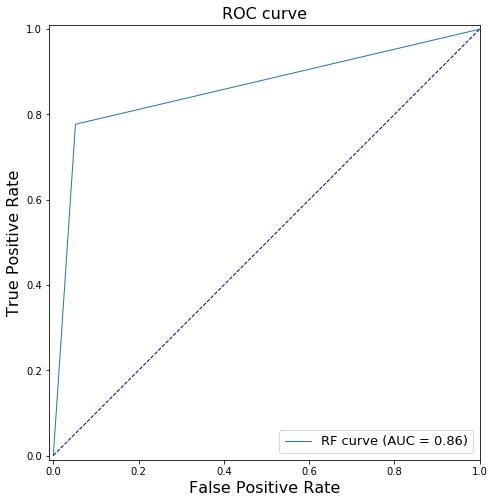

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 14 dimensions is :-
[[7527  385]
 [ 522 1814]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7912
           1       0.82      0.78      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


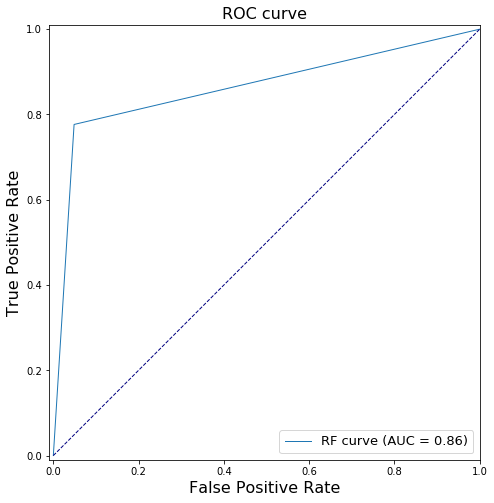

ICA Transformed - 15 dimensions is :-
[[7530  382]
 [ 536 1800]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7912
           1       0.82      0.77      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


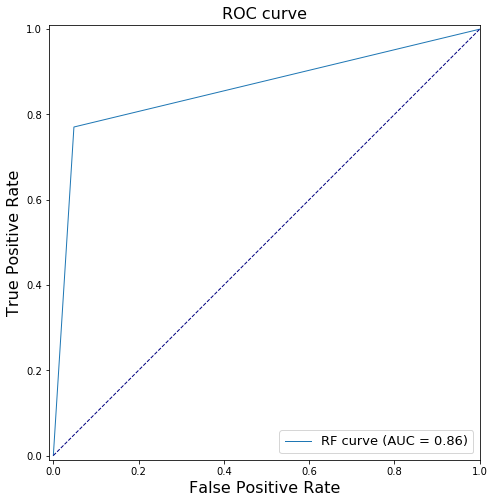

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 16 dimensions is :-
[[7533  379]
 [ 558 1778]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7912
           1       0.82      0.76      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


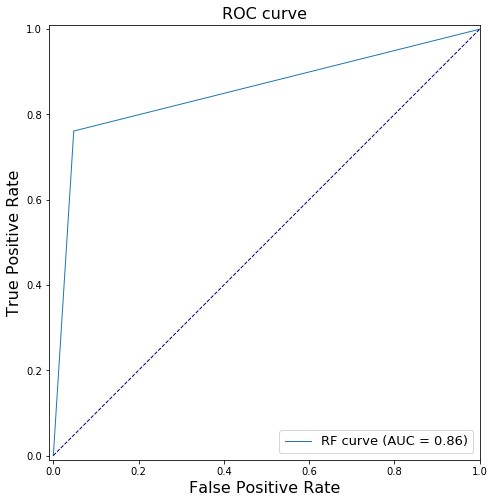

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 17 dimensions is :-
[[7537  375]
 [ 525 1811]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7912
           1       0.83      0.78      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


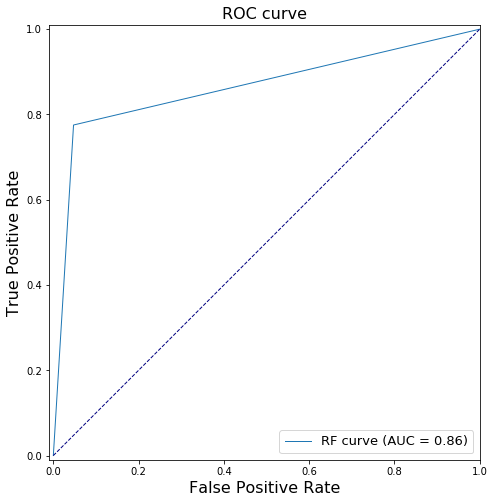

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 18 dimensions is :-
[[7548  364]
 [ 542 1794]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7912
           1       0.83      0.77      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.88      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


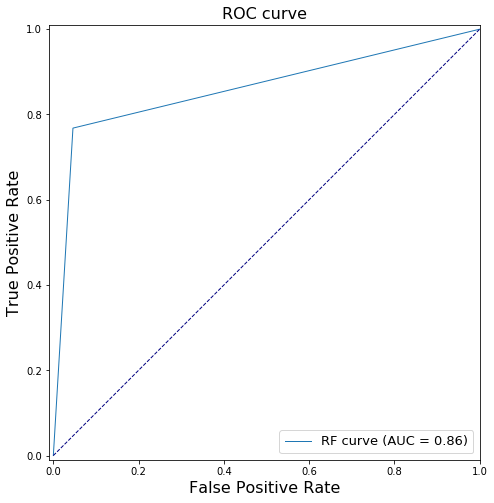

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 19 dimensions is :-
[[7552  360]
 [ 506 1830]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7912
           1       0.84      0.78      0.81      2336

    accuracy                           0.92     10248
   macro avg       0.89      0.87      0.88     10248
weighted avg       0.91      0.92      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


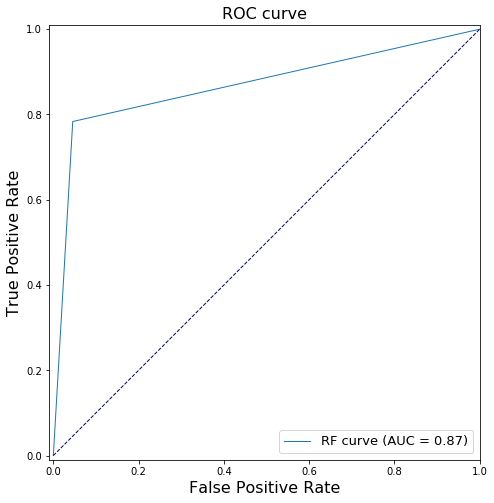

ICA Transformed - 20 dimensions is :-
[[7559  353]
 [ 526 1810]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7912
           1       0.84      0.77      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


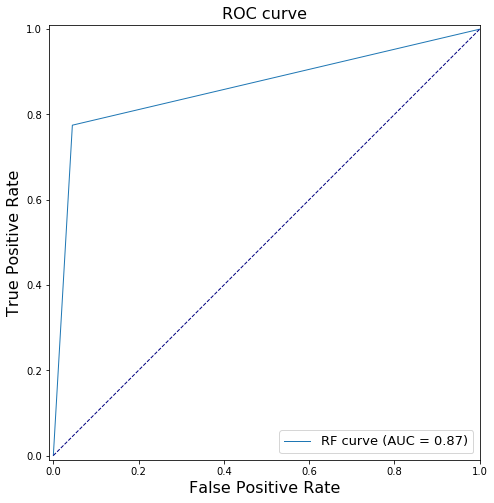

ICA Transformed - 21 dimensions is :-
[[7569  343]
 [ 533 1803]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7912
           1       0.84      0.77      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


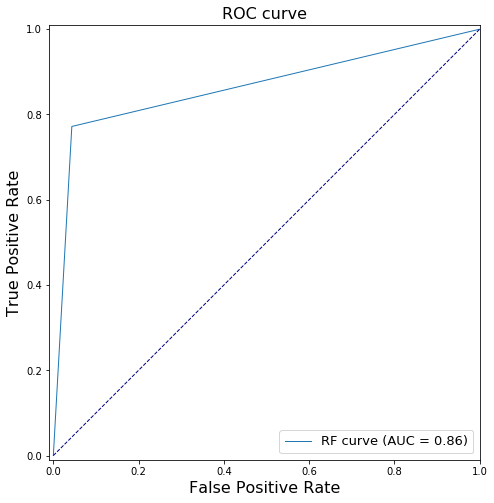

ICA Transformed - 22 dimensions is :-
[[7594  318]
 [ 593 1743]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7912
           1       0.85      0.75      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.85      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


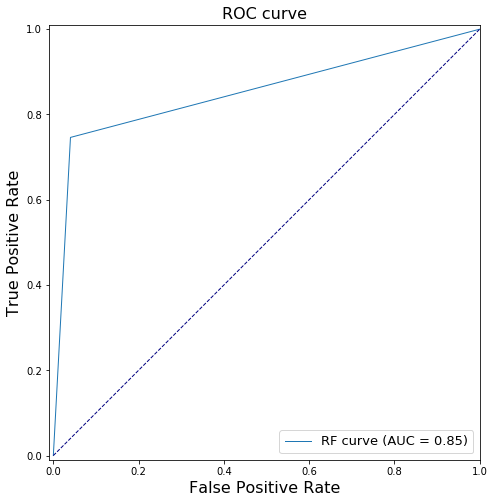

ICA Transformed - 23 dimensions is :-
[[7600  312]
 [ 587 1749]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7912
           1       0.85      0.75      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.85      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


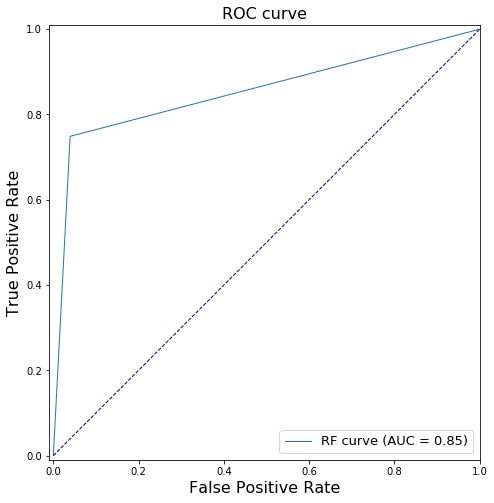

ICA Transformed - 24 dimensions is :-
[[7579  333]
 [ 562 1774]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7912
           1       0.84      0.76      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


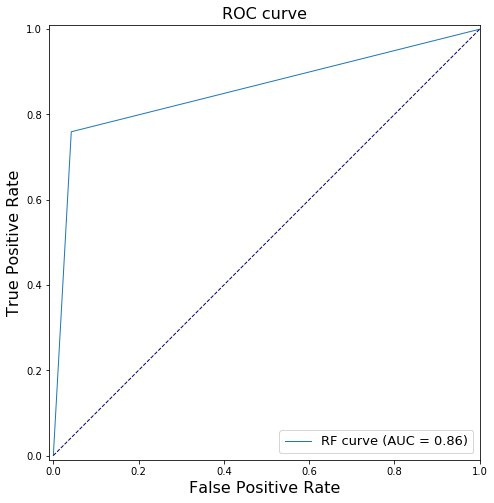

ICA Transformed - 25 dimensions is :-
[[7586  326]
 [ 576 1760]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7912
           1       0.84      0.75      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


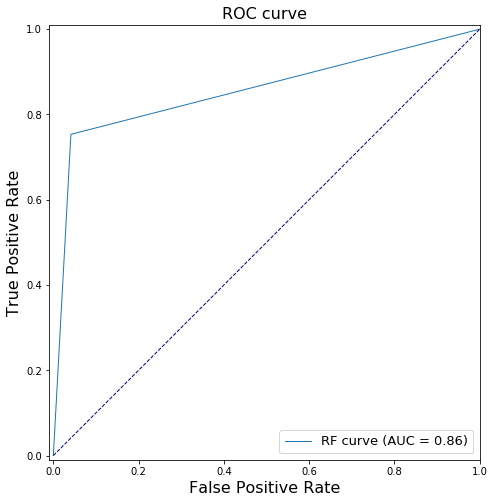

ICA Transformed - 26 dimensions is :-
[[7580  332]
 [ 553 1783]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7912
           1       0.84      0.76      0.80      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.86      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


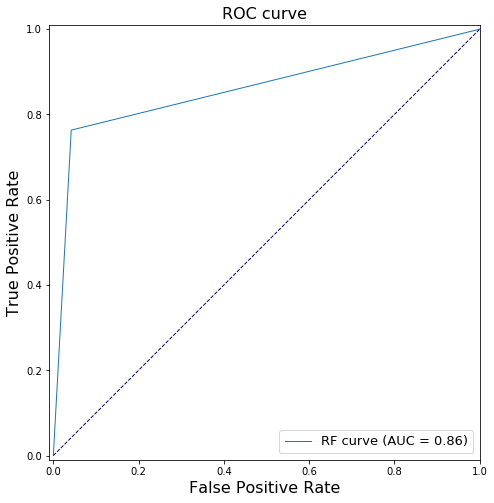

ICA Transformed - 27 dimensions is :-
[[7587  325]
 [ 584 1752]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7912
           1       0.84      0.75      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.85      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


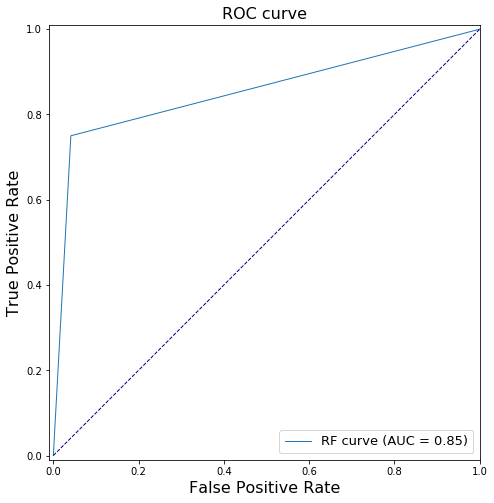

ICA Transformed - 28 dimensions is :-
[[7599  313]
 [ 595 1741]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7912
           1       0.85      0.75      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.85      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


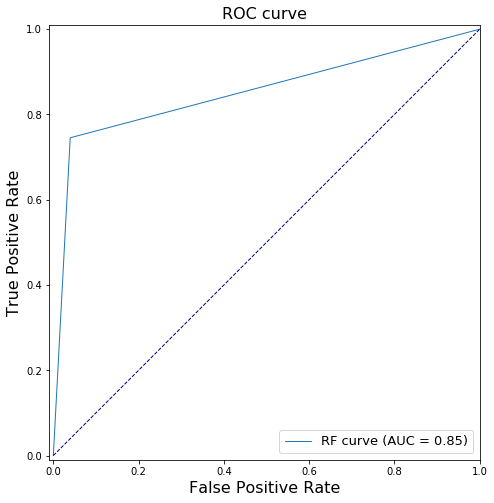

ICA Transformed - 29 dimensions is :-
[[7608  304]
 [ 608 1728]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7912
           1       0.85      0.74      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.89      0.85      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


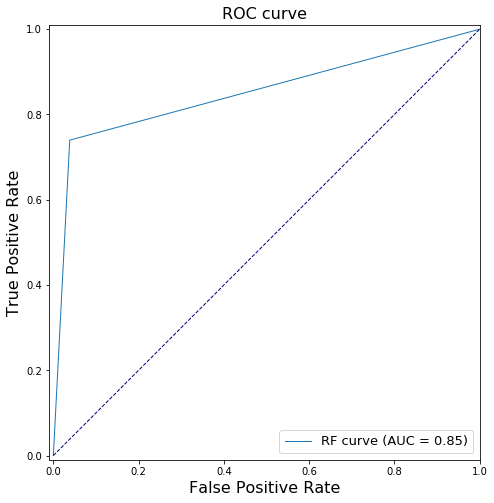

In [6]:
#Checking for best ICA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (3,30):
    ica = FastICA(n_components=i)
    X_ica = ica.fit_transform(X)
    print("ICA Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_ica, Y)

Best ICA Transformed in 8 dimensions is :-
[[7432  480]
 [ 481 1855]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.79      0.79      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


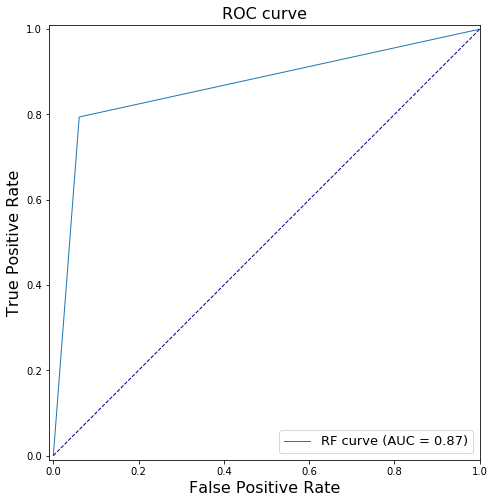

In [6]:
#Plotting Best ICA
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)
print("Best ICA Transformed in 8 dimensions is :-" )
forest_test(X_ica, Y)